In [15]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задание 1

In [ ]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/Sputnik8_test/events filters к тестовому Product Analyst Q1 2024.csv')

In [ ]:
data.query('event_action != "Page Visit"').loc[data.total_events == data.unique_events]

,event_category,event_action,event_label,total_events,unique_events
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2
8,city_landing,price_button_submit,Vladivostok / Показать предложения (28),3,3
9,city_landing,filters-categories_click,Krakow / Необычные,3,3
...,...,...,...,...,...
19082,city_landing,price_button_submit,Istanbul / Показать предложения (195),1,1
19085,city_landing,ticket-type_checkbox,Gorokhovets / Мини-группа,1,1
19088,city_landing,filters-categories_click,Ufa / Пешеходные,3,3
19089,city_landing,search-tools-button_open,Yerevan / Фильтры Выбрано: 0,16,16


In [ ]:
data.query('event_action != "Page Visit"').loc[data.total_events == data.unique_events].unique_events.sum()

34513

In [ ]:
data[data['event_label'].str.contains('Moscow')].sort_values('event_label').shift(-15).head(25)

,event_category,event_action,event_label,total_events,unique_events
12506,city_landing,filters-categories_click,Moscow / Literature & Art,1.0,1.0
18648,city_landing,search-tools-button_open,Moscow / Most popular first,1.0,1.0
1034,city_landing,filters-categories_click,Moscow / Most popular first,5.0,3.0
2009,city_landing,filters-categories_click,Moscow / Off the beaten track,1.0,1.0
1605,city_landing,filters-categories_click,Moscow / Romantic,1.0,1.0
5428,city_landing,filters-categories_click,Moscow / SPUTNIK 8,1.0,1.0
10083,city_landing,search-tools-button_open,Moscow / Selected: 0,4.0,4.0
14825,city_landing,price_button_submit,Moscow / Show offers (10),1.0,1.0
5968,city_landing,price_button_submit,Moscow / Show offers (14),2.0,2.0
3233,city_landing,price_button_submit,Moscow / Show offers (28),2.0,2.0


In [ ]:
data[data['event_label'].str.contains('Moscow')].query('event_action == "price_button_submit"').head(25)

,event_category,event_action,event_label,total_events,unique_events
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2
19,city_landing,price_button_submit,Moscow / Показать предложения (233),4,3
97,city_landing,price_button_submit,Moscow / Показать предложения (313),3,3
110,city_landing,price_button_submit,Moscow / Показать предложения (286),2,2
111,city_landing,price_button_submit,Moscow / Показать предложения (453),1,1
129,city_landing,price_button_submit,Moscow / Показать предложения (108),8,7
194,city_landing,price_button_submit,Moscow / Показать предложения (11),37,35
260,city_landing,price_button_submit,Moscow / Показать предложения (125),4,3
285,city_landing,price_button_submit,Moscow / Показать предложения (279),2,1
301,city_landing,price_button_submit,Moscow / Показать предложения (55),15,14


In [ ]:
data

,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2
...,...,...,...,...,...
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32
19088,city_landing,filters-categories_click,Ufa / Пешеходные,3,3
19089,city_landing,search-tools-button_open,Yerevan / Фильтры Выбрано: 0,16,16
19090,city_landing,price_button_submit,Pskov / Показать предложения (35),7,7


In [ ]:
data.loc[(data.event_action == 'Page Visit') & (data.event_label.str.contains('Moscow'))]

,event_category,event_action,event_label,total_events,unique_events
5428,City Page,Page Visit,Moscow,202253,134254


## Описание data:
    ### 1 строка =  1 вариант совершенного события
    ### event action - название действия события, где Page Visit - всегда посещение (= пользователь открыл страницу сайта), остальные события - всегда клики по элементам страницы (кнопки, чекбоксы), где элементы - это фильтры на мобильной версии сайта.
    
    ### event label - дополнительная информация по событию в лейбле на 1 месте всегда название города. Там, где в лейбле через / написано что-то еще - это текст, по которому пользователь кликнул. Там встречается много грязных данных!!!
    
    ### metrics: это количество всех (total events) и уникальных (unique events) событий, которые были затреканы на сайте
    
    ### event_category - равно 'City Page' для event action = Page Visit; равно 'city_landing' для остальных event action

## *важно! в event label много грязных данных, оттуда можно убрать числа.
### там могут встречаться разные вещи.
### это нормально, поступай с этим так, как тебе покажется правильным

## Проанализирую использование фильтров пользователями на страницах городов. вопросы, на которые стоит ответить:
  ### 1. Сколько людей пользуются фильтрами?
  ### 2. В каких городах фильтрами пользуются больше? в каких меньше?
  ### 3. Какие разделы фильтров наиболее востребованы? “фильтры”, “сортировка”, “категории”?
  ### 4. Как часто люди пользуются выбором цены?

In [ ]:
# 0. Проверю пропуски в данных и типы данных
data.info() # пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19092 entries, 0 to 19091
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_category  19092 non-null  object
 1   event_action    19092 non-null  object
 2   event_label     19092 non-null  object
 3   total_events    19092 non-null  int64 
 4   unique_events   19092 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 745.9+ KB


In [ ]:
# 1. Сколько людей пользуются фильтрами?
# Вопрос: интересует любое событие, связанное с применением фильтра или или именно использование фильтра,
# то есть событие "применить фильтры" (price_button_submit)
# может, посчитать на абсолютную метрику, а относительную - % людей ?

In [ ]:
# Чтобы найти количество людей, которые пользуются фильтрами,
# просуммирую количество уникальных событий для типа события "применить фильтры" (price_button_submit)

In [ ]:
# Максимум людей, кот пользуются фильтрами
data.loc[(data.event_action == 'price_button_submit')].unique_events.sum()

63063

In [ ]:
# Минимум, кот пользуются фильтрами
data.loc[(data.event_action == 'price_button_submit')].unique_events.max()

242

In [ ]:
# 2. В каких городах фильтрами пользуются больше? в каких меньше?

# Вопрос: (Просто больше событий или большее кол-во людей??)

In [ ]:
data['city'] = data.event_label.str.split(' / ').str.get(0)

In [ ]:
data.query("event_action != 'Page Visit'").sort_values('city')

,event_category,event_action,event_label,total_events,unique_events,city
11081,city_landing,price_button_submit,Abakan / Показать предложения (21),2,2,Abakan
54,city_landing,search-tools-button_open,Abakan / Категории,5,4,Abakan
16258,city_landing,search-tools-button_open,Abakan / Выбрано: 0,3,3,Abakan
5246,city_landing,filters-categories_click,Abakan / Сначала самые дешевые,1,1,Abakan
18512,city_landing,dates_filter_mobile,Abakan / Завтра,2,1,Abakan
...,...,...,...,...,...,...
12539,city_landing,dates_filter_mobile,zaraysk / Завтра,1,1,zaraysk
9116,city_landing,filters-categories_click,zaraysk / Сначала самые популярные,1,1,zaraysk
9906,city_landing,pay-type_checkbox,zaraysk / Оплата на месте (без предоплаты),1,1,zaraysk
15204,city_landing,price_button_submit,zaraysk / Показать предложения (5),1,1,zaraysk


In [ ]:
# больше по кол-ву событий
using_filters_info_groupped_by_city = data.query("event_action != 'Page Visit'") \
    .groupby('city', as_index=False) \
    .agg({'total_events': 'sum'})

In [ ]:
# Топ 10 городов, в которых больше всего пользуются фильтрами по кол-ву событий
top_10_cities = using_filters_info_groupped_by_city.sort_values('total_events', ascending=False).head(10)
top_10_cities

,city,total_events
149,Kaliningrad,31776
299,Saint Petersburg,30006
222,Moscow,19154
324,Sochi,15286
139,Istanbul,14087
91,Dubai,10388
156,Kazan,10095
59,Budapest,9958
15,Anapa,8753
164,Kislovodsk,7800


In [ ]:
# Топ 10 городов, в которых меньше всего пользуются фильтрами по кол-ву событий
using_filters_info_groupped_by_city.sort_values('unique_events').head(10)

,city,unique_events
71,Chambery,1
262,Pechory,1
49,Bonn,1
251,Orlando,1
339,Sydney,1
288,Rio de Janeiro,1
241,Noginsk,1
129,Herzliya,1
55,Bruges,1
130,Hluboká nad Vltavou,1


In [ ]:
# Какие фильтры используют в топ городах больше всего

In [ ]:
FILTERS_TO_ANALYZE = set(['ticket-type_checkbox', 'start_date_click', 'end_date_click', 'dates_filter_mobile', 'price_first', 'price_second', 'price_third', 'pay-type_checkbox'])

In [ ]:
TOP_CITIES = top_10_cities.city.values
TOP_CITIES

array(['Kaliningrad', 'Saint Petersburg', 'Moscow', 'Sochi', 'Istanbul',
       'Dubai', 'Kazan', 'Budapest', 'Anapa', 'Kislovodsk'], dtype=object)

In [ ]:
cities_filters_to_analyze = data[data.event_action.apply(lambda x: x in FILTERS_TO_ANALYZE)]

In [ ]:
cities_filters_to_analyze = city_data_filter_to_analyze[city_data_filter_to_analyze.city.apply(lambda x: x in TOP_CITIES)]

In [ ]:
cities_filters_to_analyze

,event_category,event_action,event_label,total_events,unique_events,city
45,city_landing,price_third,Saint Petersburg,186,94,Saint Petersburg
100,city_landing,dates_filter_mobile,Moscow / Today,1,1,Moscow
253,city_landing,price_second,Kislovodsk,55,35,Kislovodsk
468,city_landing,end_date_click,Istanbul,522,407,Istanbul
520,city_landing,dates_filter_mobile,Anapa / Завтра,181,146,Anapa
...,...,...,...,...,...,...
17900,city_landing,pay-type_checkbox,Budapest / Оплата на месте (без предоплаты),242,186,Budapest
17948,city_landing,price_second,Anapa,98,74,Anapa
17959,city_landing,dates_filter_mobile,Istanbul / Сегодня,203,153,Istanbul
18110,city_landing,price_first,Istanbul,489,367,Istanbul


In [ ]:
cities_filters_to_analyze_grouped = cities_filters_to_analyze.groupby(['city', 'event_action'], as_index=False).total_events.sum()
cities_filters_to_analyze_grouped = cities_filters_to_analyze_grouped.merge(top_10_cities, how='left', on='city').rename(columns={'total_events_x':'total_events', 'total_events_y': 'total_events_agg'})
cities_filters_to_analyze_grouped_sorted = cities_filters_to_analyze_grouped.sort_values(['total_events_agg', 'total_events'], ascending=[False, False])
cities_filters_to_analyze_grouped_sorted

,city,event_action,total_events,total_events_agg
39,Kaliningrad,ticket-type_checkbox,1954,31776
38,Kaliningrad,start_date_click,1824,31776
32,Kaliningrad,dates_filter_mobile,1574,31776
33,Kaliningrad,end_date_click,1354,31776
35,Kaliningrad,price_first,748,31776
...,...,...,...,...
48,Kislovodsk,dates_filter_mobile,270,7800
51,Kislovodsk,price_first,218,7800
50,Kislovodsk,pay-type_checkbox,145,7800
52,Kislovodsk,price_second,55,7800


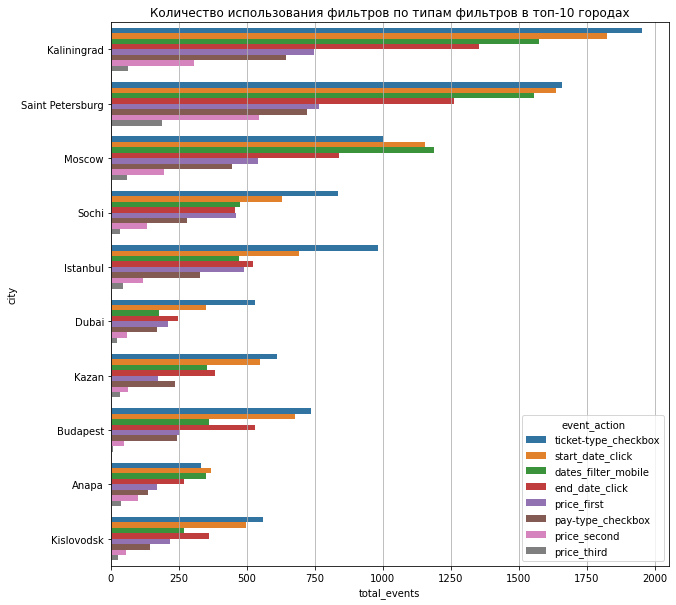

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Количество использования фильтров по типам фильтров в топ-10 городах')
sns.barplot(data=cities_filters_to_analyze_grouped_sorted, x='total_events', y='city', hue='event_action')

In [ ]:
# 3. Какие разделы фильтров наиболее востребованы? “фильтры”, “сортировка”, “категории”?
# По кол-ву событий

In [ ]:
# Разделы - “фильтры”, “сортировка”, “категории”

In [ ]:
categories_and_sorts = data[(data.event_action == 'filters-categories_click') & (data.event_action != 'search-tools-button_open')].copy()

In [ ]:
categories_and_sorts.head()

,event_category,event_action,event_label,total_events,unique_events
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
9,city_landing,filters-categories_click,Krakow / Необычные,3,3
11,city_landing,filters-categories_click,Barcelona / Сначала самые дешевые,62,50
12,city_landing,filters-categories_click,Novorossiysk / Автобусные,42,32
15,city_landing,filters-categories_click,Sergiev Posad / Групповые,10,8


In [ ]:
categories_and_sorts['filter_type']  = categories_and_sorts.event_label.str.split(' / ').str.get(1).str.lower()

In [ ]:
categories_and_sorts.head(25)

,event_category,event_action,event_label,total_events,unique_events,filter_type
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1,экскурсии в геленджике цены
9,city_landing,filters-categories_click,Krakow / Необычные,3,3,необычные
11,city_landing,filters-categories_click,Barcelona / Сначала самые дешевые,62,50,сначала самые дешевые
12,city_landing,filters-categories_click,Novorossiysk / Автобусные,42,32,автобусные
15,city_landing,filters-categories_click,Sergiev Posad / Групповые,10,8,групповые
23,city_landing,filters-categories_click,Saint Petersburg / СЕМЕЙНЫЕ ЭКСКУРСИИ В ПЕТЕРБ...,2,1,семейные экскурсии в петербурге
26,city_landing,filters-categories_click,Tula / Обзорные,23,17,обзорные
46,city_landing,filters-categories_click,Novosibirsk / Популярные,33,24,популярные
47,city_landing,filters-categories_click,Kolomna / Гастрономические,4,4,гастрономические
62,city_landing,filters-categories_click,Hurghada / Выездные,45,38,выездные


In [ ]:
categories_and_sorts.filter_type.unique()

array(['экскурсии в геленджике цены', 'необычные',
       'сначала самые дешевые', 'автобусные', 'групповые',
       'семейные экскурсии в петербурге', 'обзорные', 'популярные',
       'гастрономические', 'выездные', 'экскурсии по г москва',
       'фотопрогулки', 'пешеходные', 'индивидуальные', 'по рейтингу',
       'вечерние экскурсии', 'саратовский лимонарий', 'автобусні',
       'сначала самые популярные', 'водные экскурсии в казани',
       'светлогорск', 'история и культура', 'авторские',
       'экскурсии в нижнем новгороде цены',
       'обзорная экскурсия по новосибирску', 'однодневные', 'музеи',
       'по уралу', 'для детей', 'экскурсии по шарм эль шейху',
       'парк цветов', 'билеты без очереди', 'ночные экскурсии',
       'заказать экскурсию в нижнем новгороде', 'экскурсии будапешт',
       'экскурсия по суздалю заказать',
       'прага достопримечательности экскурсии',
       'калининград экскурсии по городу',
       'однодневные экскурсии из твери на автобусе',
       

In [ ]:
SORT_TYPES = set(['по рейтингу', 'сначала самые дешевые', 'сначала самые популярные', 'by rating', 'cheapest first', 'most popular first','הפופולרי ביותר ראשון'])

In [ ]:
categories = categories_and_sorts[categories_and_sorts.filter_type.apply(lambda x: x not in SORT_TYPES)]

In [ ]:
categories

,event_category,event_action,event_label,total_events,unique_events,filter_type
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1,экскурсии в геленджике цены
9,city_landing,filters-categories_click,Krakow / Необычные,3,3,необычные
12,city_landing,filters-categories_click,Novorossiysk / Автобусные,42,32,автобусные
15,city_landing,filters-categories_click,Sergiev Posad / Групповые,10,8,групповые
23,city_landing,filters-categories_click,Saint Petersburg / СЕМЕЙНЫЕ ЭКСКУРСИИ В ПЕТЕРБ...,2,1,семейные экскурсии в петербурге
...,...,...,...,...,...,...
19074,city_landing,filters-categories_click,Belek / Для детей,21,15,для детей
19075,city_landing,filters-categories_click,Rome / На сигвее,1,1,на сигвее
19080,city_landing,filters-categories_click,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ НА РУССКОМ ЯЗЫ...,1,1,экскурсии в стамбуле на русском языке цена
19083,city_landing,filters-categories_click,Moscow / ЭКСКУРСИИ МОСКВА,14,10,экскурсии москва


In [ ]:
sorts = categories_and_sorts[categories_and_sorts.filter_type.apply(lambda x: x in SORT_TYPES)]

In [ ]:
sorts

,event_category,event_action,event_label,total_events,unique_events,filter_type
11,city_landing,filters-categories_click,Barcelona / Сначала самые дешевые,62,50,сначала самые дешевые
130,city_landing,filters-categories_click,Florence / По рейтингу,2,2,по рейтингу
193,city_landing,filters-categories_click,Bryansk / Сначала самые популярные,1,1,сначала самые популярные
266,city_landing,filters-categories_click,Grozny / Сначала самые дешевые,22,20,сначала самые дешевые
288,city_landing,filters-categories_click,Thessaloniki / Сначала самые дешевые,3,3,сначала самые дешевые
...,...,...,...,...,...,...
19011,city_landing,filters-categories_click,Saint Petersburg / Сначала самые популярные,798,482,сначала самые популярные
19034,city_landing,filters-categories_click,Sharm-el-Sheikh / Сначала самые популярные,245,224,сначала самые популярные
19050,city_landing,filters-categories_click,Belgrade / По рейтингу,5,5,по рейтингу
19060,city_landing,filters-categories_click,Omsk / Сначала самые популярные,3,3,сначала самые популярные


In [ ]:
filters = data[(data.event_action != 'Page Visit') & (data.event_action != 'filters-categories_click') & (data.event_action != 'search-tools-button_open')]

In [ ]:
filters

,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2
5,city_landing,clear_filter_mobile,Vienna,12,11
6,city_landing,start_date_click,Vilnius,9,4
...,...,...,...,...,...
19082,city_landing,price_button_submit,Istanbul / Показать предложения (195),1,1
19084,city_landing,pay-type_checkbox,Alushta / Оплата на месте (без предоплаты),63,52
19085,city_landing,ticket-type_checkbox,Gorokhovets / Мини-группа,1,1
19086,city_landing,ticket-type_checkbox,Smolensk / Групповая,22,17


In [ ]:
print(
    categories.total_events.sum(),
    sorts.total_events.sum(),
    filters.total_events.sum(),
)

59612 20453 179856


In [ ]:
data[data['event_action'] == 'search-tools-button_open']

,event_category,event_action,event_label,total_events,unique_events
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4
...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32


In [ ]:
# 4. Как часто люди пользуются выбором цены?
# Отавлю фильтры, которые относятся к настройке цены

In [ ]:
PRICES_LABELS = set(['price_first', 'price_second', 'price_third'])

In [ ]:
price_filter_only = data[data.event_action.apply(lambda x: x in PRICES_LABELS)]

In [ ]:
price_filter_only

,event_category,event_action,event_label,total_events,unique_events
21,city_landing,price_third,Petrozavodsk,6,4
45,city_landing,price_third,Saint Petersburg,186,94
49,city_landing,price_second,Thessaloniki,3,1
132,city_landing,price_third,Makhachkala,4,3
253,city_landing,price_second,Kislovodsk,55,35
...,...,...,...,...,...
18914,city_landing,price_second,Alushta,30,20
18982,city_landing,price_second,Tver,4,4
18996,city_landing,price_first,Stockholm,2,2
19001,city_landing,price_first,Pskov,68,52


In [ ]:
price_filters_total_events = price_filter_only.total_events.sum()

In [ ]:
np.round(price_filters_total_events / filters.total_events.sum() * 100, 2)

6.84

In [ ]:
np.round(price_filters_total_events / (filters.total_events.sum() + sorts.total_events.sum() + categories.total_events.sum())* 100, 2)

4.73

# Задание 2

## Проверить гипотезу о том, что добавление нового фильтра увеличивает количество бронирований.
## Результат, который мы хотим достичь с помощью нового фильтра, - это увеличение количества бронирований.

## Целевая метрика для сравнения контрольной и тестовой групп - конверсия в бронирование после перехода на сайт, так как количество переходов на сайт одинаковое в группах
## Конверсия = кол-во бронирований / кол-во заходов на сайт

In [1]:
count1 = 450
n1 = 5000
count2 = 300
n2 = n1

In [2]:
# Конверсия в группе А
conversion_a = count2 / n2
conversion_a

0.06

In [3]:
# Конверсия в группе Б
conversion_b = count1 / n1
conversion_b

0.09

# Проверим несколькими способами, значимо ли различие конверсий в группе А и группе Б, где гипотезы:
  # H0: conversion_b = conversion_a
  # H1: conversion_b > conversion_a

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
success_cnts = np.array([count1, count2])
total_cnts = np.array([n1, n2])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='larger')
print('One-sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
pval

One-sided z-test: z = 5.6949, p value = 0.0000


6.170477315681293e-09

p value < 0,05 => Отвергаем H0. Различия стат значимы и конверсия в группе Б больше, чем конверсия в группе А.

#Посмотрим на 95% доверительные интервалы каждой конверсии

In [5]:
import statsmodels.api as sm

In [ ]:
low_a, high_a = sm.stats.proportion_confint(count=count2, nobs=n2, alpha=0.05, method='wilson')

In [ ]:
print(low_a, high_a)

0.05374897325570841 0.06692660445594185


In [ ]:
low_b, high_b = sm.stats.proportion_confint(count=count1, nobs=n1, alpha=0.05, method='wilson')

In [ ]:
print(low_b, high_b)

0.08237915058874333 0.0982503650062035


#95% доверительные интервалы [0.054; 0.067] и [0.082; 0.098] не пересекаются, что также говорит о стат значимом различии коверсий в двух группах.

In [ ]:
# 99% доверительный интервал.

In [6]:
sm.stats.proportion_confint(count=300, nobs=5000, alpha=0.01, method='wilson')

(0.0519180839145652, 0.06924811037151357)

In [7]:
sm.stats.proportion_confint(count=450, nobs=5000, alpha=0.01, method='wilson')

(0.0801111403311763, 0.10097554070812434)

In [ ]:
# Истинное значение вероятности оформления бронирования в группе А лежит между 5,2% - 6,7%, если бы мы провели эксперимент много раз
# Истинное значение вероятности оформления бронирования в группе Б лежит между 8% - 10,1%, если бы мы провели эксперимент много раз

#Другие способы проверить различия конверсий

In [ ]:
# 1. chi2-тест

In [11]:
import scipy.stats as ss

In [26]:
res = ss.chi2_contingency([[300, 4700], [450, 4550]])

In [27]:
res

Chi2ContingencyResult(statistic=np.float64(32.00144144144144), pvalue=np.float64(1.5405822299465274e-08), dof=1, expected_freq=array([[ 375., 4625.],
       [ 375., 4625.]]))

In [ ]:
# p_value < 0.05 => Отвергаем нулевую гипотезу, то есть различия стат значимы и добаление нового фильтра на сайт имеет эффект

In [ ]:
# 2.Тест Барнарда
# p1 - сайт с фильтром (группа Б)
# p2 - сайт без фильтра (группа А)

In [ ]:
# Проверка 1
# H0: p1 <= p2
# H1: p1 > p2

In [ ]:
res = ss.barnard_exact([[450, 300], [4550, 4700]], alternative="greater")

In [ ]:
res.statistic

5.694947974514993

In [ ]:
res.pvalue

6.296795408748488e-09

In [ ]:
# p-value < 0.05 => отклоняем H0 и принимаем H1, то есть p1 > p2 и новый фильтр увеличивает число бронирований

In [ ]:
# Проверка 2
# H0: p1 > p2
# H1: p1 <= p2

In [ ]:
res_2 = ss.barnard_exact([[450, 300], [4550, 4700]], alternative="less")

In [ ]:
res_2.statistic

5.694947974514993

In [ ]:
res_2.pvalue

1.0

In [ ]:
# p-value > 0.05 => принимаем H0, то есть p1 > p2 и новый фильтр увеличивает число бронирований

In [ ]:
#3. Тест Фишера (точный)
# p1 - сайт с фильтром (группа Б)
# p2 - сайт без фильтра (группа А)

In [ ]:
# Проверка 1
# H0: p1 <= p2
# H1: p1 > p2

In [ ]:
res_fischer = ss.fisher_exact([[450, 300], [4550, 4700]], alternative='greater')

In [ ]:
res_fischer

(1.5494505494505495, 6.9788288850709e-09)

In [ ]:
# p-value < 0.05 => отклоняем H0 и принимаем H1, то есть p1 > p2 и новый фильтр увеличивает число бронирований

In [ ]:
# Проверка 2
# H0: p1 > p2
# H1: p1 <= p2

In [ ]:
res_fischer = ss.fisher_exact([[450, 300], [4550, 4700]], alternative='less')

In [ ]:
res_fischer

(1.5494505494505495, 0.9999999955301234)

In [ ]:
# p-value > 0.05 => принимаем H0, то есть p1 > p2 и новый фильтр увеличивает число бронирований

In [ ]:
# 4. Расчет z-критерия

In [ ]:
import scipy.stats.distributions as dist
import numpy as np

def z_test_2_sample_proportions(x1, x2, n1, n2, two_tailed=True):
    '''
    Calculate the test statistic for a z-test on 2 proportions from independent samples
    x1, x2: number of successes in group 1 and 2
    n1, n2: total number of observations in group 1 and 2
    Returns: test statistic (z), and p-value
    '''
    avg_p = (x1 + x2) / (n1 + n2)
    z_val = (x1/n1 - x2/n2) / np.sqrt(avg_p * (1-avg_p) * (1/n1 + 1/n2))
    z_prob = dist.norm.cdf(-np.abs(z_val))

    if two_tailed:
        return z_val, 2*z_prob

    else:
        return z_val, z_prob

In [ ]:
z_val, z_prob = z_test_2_sample_proportions(450, 300, 5000, 5000, two_tailed=False)

In [ ]:
z_val

5.694947974514993

In [ ]:
z_prob

6.170477315681293e-09

In [ ]:
z_ctitical = 1.96

In [ ]:
# Отвергаем нулевую гипотезу, так как z_val > z_ctitical
# => различия стат значимы, то есть добаление нового фильтра на сайт имеет эффект

In [ ]:
# 5. 95% доверительный интервал для разности (p1 - p2)

In [ ]:
from statsmodels import stats as st

In [ ]:
low, upp = st.proportion.confint_proportions_2indep(450, 5000, 300, 5000, method='wald', compare='diff', alpha=0.05, correction=True)

In [ ]:
print(low, upp)

0.019692005482131864 0.04030799451786814


In [ ]:
# Доверительный интервал для разности (p1 - p2) не захватывает 0, значит, различия стат значимы